In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from sklearn import preprocessing
from numpy import log

## Statistical libs 
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv("Data//features_data.csv",sep=";",index_col=0)

In [3]:
df.head()

,Date,Close,Open,High,Low,Vol,Var,Open_Dollar,Open_IBOVESPA,DayofWeek,Weekofyear,Quarter,Month,News_N,News_NN,News_P
0,2020-05-20,21.60,21.93,21.95,21.36,41170000.0,-0.41,5.7559,80746.81,2,21,2,5,0,0,1
1,2020-05-19,21.69,22.63,22.72,21.61,40390000.0,-4.32,5.7192,81196.69,1,21,2,5,0,0,1
2,2020-05-18,22.67,22.45,22.94,22.01,49340000.0,4.81,5.8565,77575.71,0,21,2,5,0,0,1
3,2020-05-15,21.63,22.50,22.77,21.63,37620000.0,-4.08,5.8110,79010.59,4,20,2,5,0,0,1
4,2020-05-14,22.55,21.31,22.59,20.73,61540000.0,4.40,5.9248,77770.48,3,20,2,5,0,0,1


# Feature scaling

Remember, our target variable is the Close, that's the price that the share will be in final of the day. So we'll scale all the independent variables to avoid the larger scale resources impacting more that the others.

In [6]:
s = df['Close']
lag_col = pd.concat([s.shift(), s.shift(2),s.shift(3)], axis=1)
lag_col.columns = ['lag_1','lag_2','lag_3']
df = pd.concat([df, lag_col], axis=1, sort=False).dropna()

In [7]:
df.head()

,Date,Close,Open,High,Low,Vol,Var,Open_Dollar,Open_IBOVESPA,DayofWeek,Weekofyear,Quarter,Month,News_N,News_NN,News_P,lag_1,lag_2,lag_3
3,2020-05-15,21.63,22.50,22.77,21.63,37620000.0,-4.08,5.8110,79010.59,4,20,2,5,0,0,1,22.67,21.69,21.60
4,2020-05-14,22.55,21.31,22.59,20.73,61540000.0,4.40,5.9248,77770.48,3,20,2,5,0,0,1,21.63,22.67,21.69
5,2020-05-13,21.60,21.74,21.94,21.20,34530000.0,-0.05,5.8863,77876.88,2,20,2,5,1,0,0,22.55,21.63,22.67
6,2020-05-12,21.61,22.51,22.66,21.59,42900000.0,-3.44,5.8190,79064.60,1,20,2,5,1,0,0,21.60,22.55,21.63
7,2020-05-11,22.38,22.17,23.03,22.17,37900000.0,0.27,5.7825,80263.42,0,20,2,5,1,0,0,21.61,21.60,22.55


In [8]:
df['lag_1']= preprocessing.scale(df['lag_1'])
df['lag_2']= preprocessing.scale(df['lag_2'])
df['lag_3']= preprocessing.scale(df['lag_3'])
df['Open']= preprocessing.scale(df['Open'])
df['High']= preprocessing.scale(df['High'])
df['Low']= preprocessing.scale(df['Low'])
df['Vol']= preprocessing.scale(df['Vol'])
df['Var']= preprocessing.scale(df['Var'])
df['Open_Dollar']= preprocessing.scale(df['Open_Dollar'])
df['Open_IBOVESPA']= preprocessing.scale(df['Open_IBOVESPA'])

In [9]:
df.to_csv("Data//Normalized_data.csv", sep=';')

In [10]:
df.tail()

,Date,Close,Open,High,Low,Vol,Var,Open_Dollar,Open_IBOVESPA,DayofWeek,Weekofyear,Quarter,Month,News_N,News_NN,News_P,lag_1,lag_2,lag_3
3742,2005-04-11,4.34,-1.244518,-1.249674,-1.236755,0.175913,0.380657,0.003181,-1.860300,0,15,2,4,0,0,1,-1.245974,-1.246672,-1.259534
3743,2005-04-08,4.30,-1.243303,-1.253282,-1.237984,0.612276,-0.333290,0.013730,-1.837179,4,14,2,4,0,0,1,-1.242325,-1.246672,-1.247369
3744,2005-04-07,4.33,-1.244518,-1.252080,-1.236755,2.178052,0.173524,0.013495,-1.870653,3,14,2,4,0,0,1,-1.247190,-1.243022,-1.247369
3745,2005-04-06,4.31,-1.243303,-1.248472,-1.236755,2.175839,-0.130565,0.052995,-1.851831,2,14,2,4,0,0,1,-1.243541,-1.247888,-1.243719
3746,2005-04-05,4.32,-1.244518,-1.244864,-1.236755,2.285151,-0.029202,0.061785,-1.831555,1,14,2,4,0,0,1,-1.245974,-1.244239,-1.248585


# Correlation

It's a important step to identify the features that has a great impact in our target variable, and eliminating the variables with a low correlation. In the Deep Learning, it's similar to L1 regularization that avoid the features with low impact in our model.

In [11]:
Matrix_corr = df.corr()

In [12]:
Matrix_corr

,Close,Open,High,Low,Vol,Var,Open_Dollar,Open_IBOVESPA,DayofWeek,Weekofyear,Quarter,Month,News_N,News_NN,News_P,lag_1,lag_2,lag_3
Close,1.000000,0.999431,0.999741,0.999740,0.060209,0.003757,0.777244,0.862222,0.000654,-0.023384,-0.021621,-0.025061,0.338865,0.073264,-0.345495,0.999188,0.998422,0.997680
Open,0.999431,1.000000,0.999732,0.999712,0.059886,-0.018614,0.777601,0.863125,-0.000003,-0.023241,-0.021534,-0.024832,0.338847,0.073748,-0.345631,0.998591,0.997904,0.997203
High,0.999741,0.999732,1.000000,0.999653,0.062757,-0.008207,0.780184,0.862325,0.000446,-0.023473,-0.021831,-0.025135,0.338986,0.074354,-0.345955,0.998941,0.998190,0.997463
Low,0.999740,0.999712,0.999653,1.000000,0.057441,-0.007572,0.775282,0.862972,-0.000300,-0.022878,-0.020967,-0.024453,0.338512,0.072449,-0.344900,0.998973,0.998255,0.997553
Vol,0.060209,0.059886,0.062757,0.057441,1.000000,0.008024,0.191600,-0.038853,0.033644,-0.016688,-0.022193,-0.017174,0.042911,0.046039,-0.055405,0.059882,0.059609,0.059180
Var,0.003757,-0.018614,-0.008207,-0.007572,0.008024,1.000000,-0.004770,-0.047548,0.001534,0.011459,0.015673,0.010868,-0.012519,0.007338,0.009580,0.003464,0.002956,0.001118
Open_Dollar,0.777244,0.777601,0.780184,0.775282,0.191600,-0.004770,1.000000,0.468717,-0.001316,-0.019838,-0.023090,-0.022277,0.310513,0.144166,-0.341011,0.777265,0.777123,0.776958
Open_IBOVESPA,0.862222,0.863125,0.862325,0.862972,-0.038853,-0.047548,0.468717,1.000000,0.002019,-0.038659,-0.036810,-0.041266,0.365490,0.076671,-0.371896,0.860894,0.859539,0.858231
DayofWeek,0.000654,-0.000003,0.000446,-0.000300,0.033644,0.001534,-0.001316,0.002019,1.000000,-0.014529,-0.009518,-0.007394,0.004121,0.007487,-0.006293,-0.000569,-0.000302,0.000505
Weekofyear,-0.023384,-0.023241,-0.023473,-0.022878,-0.016688,0.011459,-0.019838,-0.038659,-0.014529,1.000000,0.960022,0.987253,0.030426,-0.018023,-0.023222,-0.022560,-0.021372,-0.020189


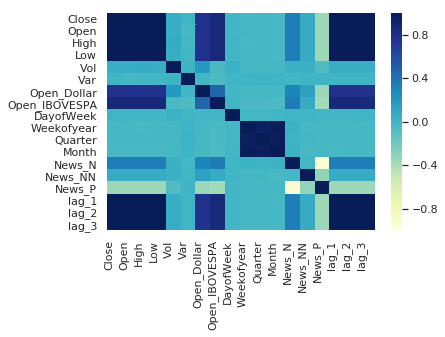

In [13]:
ax = sns.heatmap(Matrix_corr, vmin=-1, vmax=1, cmap='YlGnBu', robust=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right');

The features that have a significant impact in our model is: Open, Open_Dollar, Open_IBOVESPA and a minima relevance is the news (News_N, News_NN, News_P), considering that we can get it in 8am, where the stock market openning, so that we can make a forecast earlier in the day, due that the news doesn't seem impact a lot.

# Statistical Study

Let's study the Time Series a little bit more closely and identify if it is stationary or non-stationary, to verify it is used a hypothesis test using the Statistical modeling methods called Adfuller, if p-value > 0.05 it fails to reject the null hypothesis (H0), the data has a unit root and is non-stationarity. Why is it necessary? well, if garanting the non-stationary of the time series we can add the statistical forecast model such as AR, MA, ARIMA, SARIMA and among others variations.

In [14]:
df = df.sort_index(ascending = False).reset_index(drop=True)
result = adfuller(df['Close'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.268720
p-value: 0.643359


The p-value is 0.636, therefore it rejects the null-hypothesis and considers the alternative hypothesys (H1), so it's a non-stacionary time serie, and now we can try differents kind of statistical forecast.

/home/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


Text(0, 0.5, 'Residual')

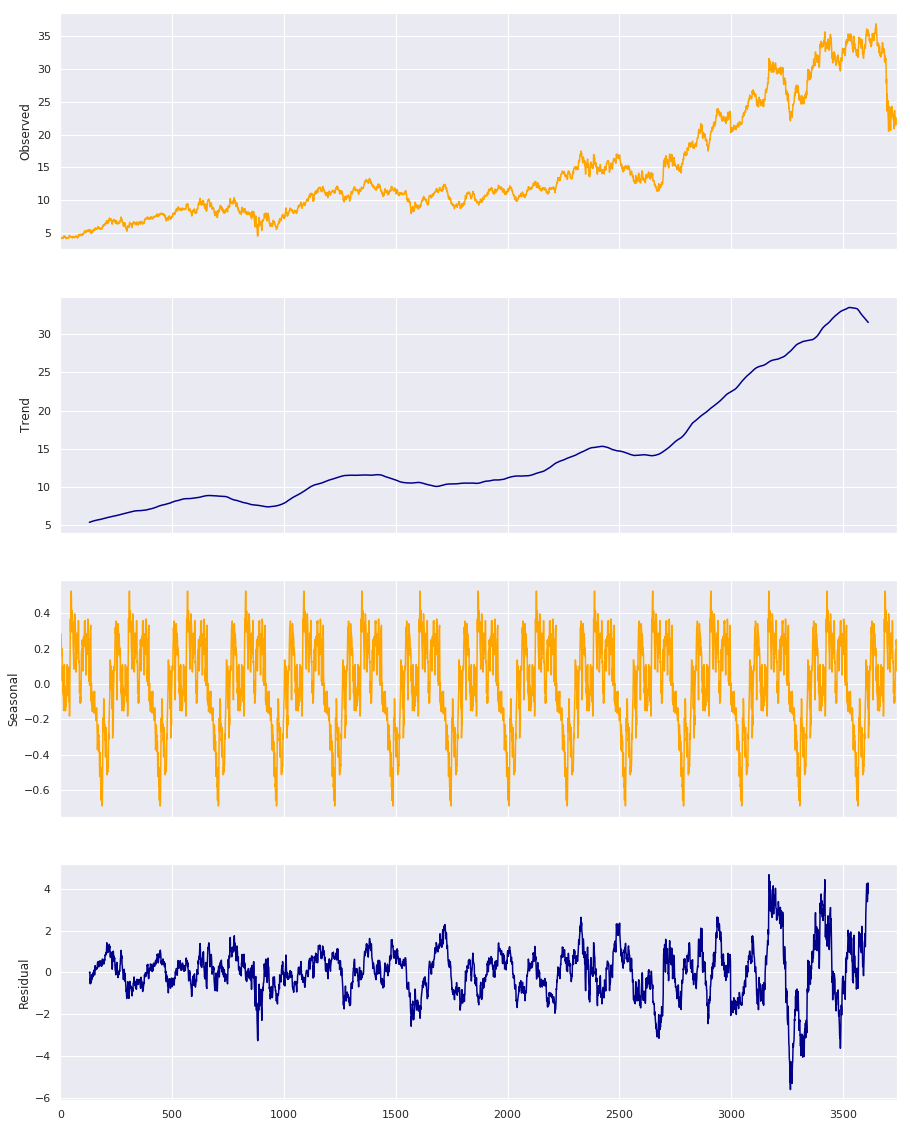

In [15]:
from matplotlib.pyplot import figure
import statsmodels.api as sm

decomposition=sm.tsa.seasonal_decompose(df['Close'],model='additive',freq=260)

fig, axes = plt.subplots(4, 1, sharex=True)
fig.set_size_inches(15,20)
decomposition.observed.plot(ax=axes[0], legend=False, color='orange')
axes[0].set_ylabel('Observed')
decomposition.trend.plot(ax=axes[1], legend=False, color='darkblue')
axes[1].set_ylabel('Trend')
decomposition.seasonal.plot(ax=axes[2], legend=False, color='orange')
axes[2].set_ylabel('Seasonal')
decomposition.resid.plot(ax=axes[3], legend=False, color='darkblue')
axes[3].set_ylabel('Residual')

Using the decompose with a frequency of 260, due the working days of the year, we can notice clearly that the time series has a trend and a seasonality, using it to a solid understanding it's possible extract some insights and can be helpfull to our model.

In [16]:
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [17]:
y_test = df['Close']
test_adf(y_test, "Itub4 Time Series")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Itub4 Time Series


In [18]:
test_adf(y_test.diff(), "Itub4 Time Series")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary Itub4 Time Series


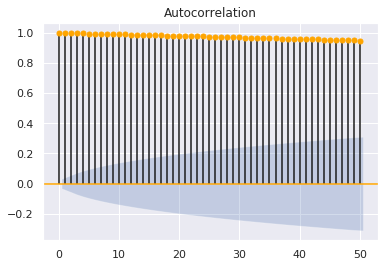

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Close'], lags=50, color= 'orange');

The ACF suggests there is long memory present in the data set, so that Long-range dependence. Its a caracteristic of non-stacionary time series.

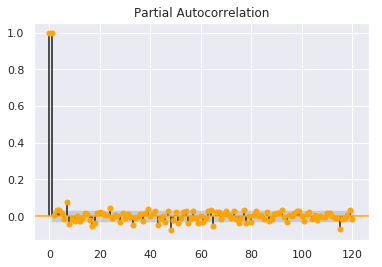

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'], lags=120,color= 'orange');

The PACF will identify the order of the Ar model, thus AR(2) because it has 2 significant spikes on the lags 1 and 2, but we will use a powerful tool called auto-arima in the next step, so don't worry about that.

## Conclusion
It will help to select our regression models that we need compare them and pick the best model. it was possible identify features that have a significant correlation that we can use as independent variables for our regression models. It was possible too notice that we can add statistical models (ARIMA,SARIMA...) to make a comparison to others kind of regressions, due the non-stationarity of the time series. The next step is pick the best model to make a forecast for our time series using metrics of regression such as R-squared, rmse and others.